# What sells a car?

You're an analyst at Crankshaft List. Hundreds of free advertisements for vehicles are published on your site every day. You need to study data collected over the last few years and determine which factors influence the price of a vehicle.

## Initialization

In [1]:
# Loading all the libraries
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

### Load data

In [2]:
# Load the data file into a DataFrame
try:
    data = pd.read_csv(r"C:\Users\tomsh\Desktop\Python Projects\Project 2 - EDA\vehicles_us.csv")
except:
    data = pd.read_csv('/datasets/vehicles_us.csv')

### Explore initial data

The dataset contains the following fields:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, diesel, etc.
- `odometer` — the vehicle's mileage when the ad was published
- `transmission`
- `paint_color`
- `is_4wd` — whether the vehicle has 4-wheel drive (Boolean type)
- `date_posted` — the date the ad was published
- `days_listed` — from publication to removal

In [3]:
# print the general/summary information about the DataFrame
data.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [5]:
# print a sample of data
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


* potential outliers (min/max) in price column
* NaN values in: 'modle_year', 'cylinders', 'odometer', 'paint_color' and 'is4w'.
* Our dataset build from 51252 entries and total of 13 columns.

* date_posted column is not a date type

In [6]:
data.isnull().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [7]:
data.isnull().sum()/len(data)

price           0.000000
model_year      0.070238
model           0.000000
condition       0.000000
cylinders       0.102086
fuel            0.000000
odometer        0.153168
transmission    0.000000
type            0.000000
paint_color     0.179854
is_4wd          0.503697
date_posted     0.000000
days_listed     0.000000
dtype: float64

In [8]:
for i in data:
    if data[i].isnull().sum()>0:
        print(i)

model_year
cylinders
odometer
paint_color
is_4wd


**Above are the columns with missing values**

### Conclusions and further steps

**My conclusions**

* There are columns with missing values which we'll need to treat.
* In 'is_4wd' column there are 50% of missing values, we'll have to investigate further more.
* There are some column types we'll need to convert, i.e - date_posted convert to date type.

## Treat missing values (if any)

**'model_year' missing values**

In [9]:
print('{:.0%}'.format(data.model_year.isnull().sum()/len(data)))

7%


In [10]:
data[data.model_year.isnull()].head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
20,6990,NaN,chevrolet tahoe,excellent,8.0,gas,147485.0,automatic,SUV,silver,1.0,2018-08-05,28
65,12800,NaN,ford f-150,excellent,6.0,gas,108500.0,automatic,pickup,white,NaN,2018-09-23,15
69,7800,NaN,ford f-150,like new,8.0,gas,97510.0,automatic,truck,white,1.0,2019-02-20,39
72,3650,NaN,subaru impreza,excellent,NaN,gas,74000.0,automatic,sedan,blue,1.0,2018-08-07,60


In [11]:
data['model_year'] = data['model_year'].fillna(data.groupby('model')['model_year'].transform('median'))

In [12]:
data['model_year'].isnull().sum()

0

**'cylinders' missing values**

In [13]:
print('{:.0%}'.format(data.cylinders.isnull().sum()/len(data)))

10%


In [14]:
data[data.cylinders.isnull()].head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17
36,10499,2013.0,chrysler 300,good,NaN,gas,88042.0,automatic,sedan,NaN,NaN,2018-05-05,22
37,7500,2005.0,toyota tacoma,good,NaN,gas,160000.0,automatic,pickup,NaN,NaN,2018-07-22,44
59,5200,2006.0,toyota highlander,good,NaN,gas,186000.0,automatic,SUV,green,NaN,2018-12-20,2
63,30000,1966.0,ford mustang,excellent,NaN,gas,51000.0,manual,convertible,red,NaN,2019-01-23,17


In [15]:
data['cylinders'] = data['cylinders'].fillna(data.groupby('model')['cylinders'].transform('median'))

In [16]:
data['cylinders'].isnull().sum()

0

**'odometer' missing values**

In [17]:
print('{:.0%}'.format(data.odometer.isnull().sum()/len(data)))

15%


In [18]:
data[data.odometer.isnull()].head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
15,17990,2013.0,ram 1500,excellent,8.0,gas,NaN,automatic,pickup,red,1.0,2018-05-15,111
23,7500,2004.0,jeep wrangler,good,6.0,gas,NaN,automatic,SUV,red,1.0,2018-05-17,39
24,3950,2009.0,chrysler 200,excellent,4.0,gas,NaN,automatic,sedan,red,NaN,2018-06-11,40
25,11499,2017.0,chevrolet malibu,like new,4.0,gas,NaN,automatic,sedan,NaN,NaN,2018-07-26,43


In [19]:
data['odometer'] = data['odometer'].fillna(data.groupby('model_year')['odometer'].transform('median'))

In [20]:
data[data['odometer'].isnull()].head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
45694,18000,1929.0,ford f-150,good,8.0,gas,NaN,manual,other,silver,NaN,2018-11-18,59


In [21]:
data[data['model_year']==1929].head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
45694,18000,1929.0,ford f-150,good,8.0,gas,NaN,manual,other,silver,NaN,2018-11-18,59


In [22]:
data[(data['model_year']>1920) & (data['model_year']<1939)].head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
34713,5000,1936.0,ford f-150,excellent,6.0,gas,30000.0,manual,pickup,purple,NaN,2018-11-22,10
45694,18000,1929.0,ford f-150,good,8.0,gas,NaN,manual,other,silver,NaN,2018-11-18,59


In [23]:
data['odometer'] = data['odometer'].fillna(30000)

In [24]:
data.loc[45694]

price                18000
model_year          1929.0
model           ford f-150
condition             good
cylinders              8.0
fuel                   gas
odometer           30000.0
transmission        manual
type                 other
paint_color         silver
is_4wd                 NaN
date_posted     2018-11-18
days_listed             59
Name: 45694, dtype: object

**'paint_color' missing values**

In [25]:
print('{:.0%}'.format(data.paint_color.isnull().sum()/len(data)))

18%


In [26]:
data[data.paint_color.isnull()].head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
3,1500,2003.0,ford f-150,fair,8.0,gas,161397.0,automatic,pickup,NaN,NaN,2019-03-22,9
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
12,18990,2012.0,ram 1500,excellent,8.0,gas,140742.0,automatic,pickup,NaN,1.0,2019-04-02,37
21,5250,2007.0,toyota rav4,good,6.0,gas,154000.0,automatic,SUV,NaN,NaN,2018-08-22,8


In [27]:
data.paint_color.value_counts()

white     10029
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: paint_color, dtype: int64

In [28]:
data.paint_color.describe()

count     42258
unique       12
top       white
freq      10029
Name: paint_color, dtype: object

In [29]:
data['paint_color'] = data['paint_color'].fillna('n/a')

In [30]:
data.loc[0]

price                 9400
model_year          2011.0
model               bmw x5
condition             good
cylinders              6.0
fuel                   gas
odometer          145000.0
transmission     automatic
type                   SUV
paint_color            n/a
is_4wd                 1.0
date_posted     2018-06-23
days_listed             19
Name: 0, dtype: object

In [31]:
data.paint_color.isnull().sum()

0

**'is_4wd' missing values**

In [32]:
print('{:.0%}'.format(data.is_4wd.isnull().sum()/len(data)))

50%


In [33]:
data[data.is_4wd.notna()]['model'].value_counts()

ford f-150                  2048
chevrolet silverado 1500    1644
ram 1500                    1229
jeep wrangler               1090
ram 2500                     954
                            ... 
nissan versa                   2
nissan maxima                  1
kia soul                       1
nissan sentra                  1
hyundai elantra                1
Name: model, Length: 94, dtype: int64

In [34]:
data[data.is_4wd.isnull()]['model'].value_counts()

toyota camry                     976
honda accord                     948
nissan altima                    802
honda civic                      785
ford focus                       749
                                ... 
ford f150 supercrew cab xlt       11
subaru forester                   11
subaru impreza                    11
jeep wrangler unlimited            8
chevrolet silverado 1500 crew      2
Name: model, Length: 100, dtype: int64

In [35]:
data['is_4wd'] = data['is_4wd'].fillna(0)

In [36]:
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,n/a,1.0,2018-06-23,19
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,161397.0,automatic,pickup,n/a,0.0,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28


In [37]:
data.is_4wd.isnull().sum()

0

## Fix data types

In [38]:
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,n/a,1.0,2018-06-23,19
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,161397.0,automatic,pickup,n/a,0.0,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      51525 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


**change data type for 'model_year'**

In [40]:
data['model_year'] = pd.to_datetime(data['model_year'],format=('%Y'))

In [41]:
data['model_year'] = data['model_year'].dt.year

**change to lowercase for 'model'**

In [42]:
data['model'] = data['model'].str.lower()

**change data type for 'cylinders'**

In [43]:
data['cylinders'].value_counts()

8.0     17712
6.0     17435
4.0     15499
10.0      549
5.0       294
3.0        34
12.0        2
Name: cylinders, dtype: int64

In [44]:
data['cylinders'] = data['cylinders'].astype(int)

**check 'fuel'**

In [45]:
data.fuel.value_counts()

gas         47288
diesel       3714
hybrid        409
other         108
electric        6
Name: fuel, dtype: int64

**change data type for 'odometer'**

In [46]:
data['odometer'] = data['odometer'].astype(int)

**check 'transmission'**

In [47]:
data.transmission.value_counts()

automatic    46902
manual        2829
other         1794
Name: transmission, dtype: int64

**check 'type'**

In [48]:
data.type.value_counts()

SUV            12405
truck          12353
sedan          12154
pickup          6988
coupe           2303
wagon           1541
mini-van        1161
hatchback       1047
van              633
convertible      446
other            256
offroad          214
bus               24
Name: type, dtype: int64

In [49]:
data['type'] = data['type'].str.lower()

**change data type for 'odometer'**

In [50]:
data['is_4wd'] = data['is_4wd'].astype(int)

**further investigate for null values in 'days_listed'**

In [51]:
len(data[data['days_listed']==0])

54

In [52]:
print('{:%}'.format(len(data[data['days_listed']==0])/len(data)))

0.104803%


## Enrich data

In [53]:
# Add datetime values for when the ad was placed
data['date_posted'] = pd.to_datetime(data['date_posted'], format='%Y-%m-%d')

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  int64         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  int32         
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  int32         
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  int32         
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: datetime64[ns](1), int32(3), int64(3), object(6)
memory usage: 4.5+ MB


In [55]:
# Add year, month, weekday columns
data['year'] = data['date_posted'].dt.year
data['month'] = data['date_posted'].dt.month
data['weekday'] = data['date_posted'].dt.weekday
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year,month,weekday
0,9400,2011,bmw x5,good,6,gas,145000,automatic,suv,n/a,1,2018-06-23,19,2018,6,5
1,25500,2011,ford f-150,good,6,gas,88705,automatic,pickup,white,1,2018-10-19,50,2018,10,4
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,2019,2,3
3,1500,2003,ford f-150,fair,8,gas,161397,automatic,pickup,n/a,0,2019-03-22,9,2019,3,4
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,2019,4,1


In [56]:
data['age'] = (data['year'] - data['model_year']).astype(int) + 1
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year,month,weekday,age
0,9400,2011,bmw x5,good,6,gas,145000,automatic,suv,n/a,1,2018-06-23,19,2018,6,5,8
1,25500,2011,ford f-150,good,6,gas,88705,automatic,pickup,white,1,2018-10-19,50,2018,10,4,8
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,2019,2,3,7
3,1500,2003,ford f-150,fair,8,gas,161397,automatic,pickup,n/a,0,2019-03-22,9,2019,3,4,17
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,2019,4,1,3


In [57]:
# Add the vehicle's average mileage per year
data['mile_mean'] = (data['odometer']) / (data['age'])
data.head(1)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year,month,weekday,age,mile_mean
0,9400,2011,bmw x5,good,6,gas,145000,automatic,suv,n/a,1,2018-06-23,19,2018,6,5,8,18125.0


In [58]:
data[data['age']==0].head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year,month,weekday,age,mile_mean


In [59]:
#Reviewer's code
data[data['mile_mean']== np.inf]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year,month,weekday,age,mile_mean


In [60]:
data.condition.value_counts()

excellent    24773
good         20145
like new      4742
fair          1607
new            143
salvage        115
Name: condition, dtype: int64

In [61]:
# It might help to replace the condition values with something that can be manipulated more easily
replace_dict = {'new':5,'like new':4,'excellent':3,'good':2,'fair':1,'salvage':0}
data['condition'] = data['condition'].replace(replace_dict)

In [62]:
data.condition.value_counts()

3    24773
2    20145
4     4742
1     1607
5      143
0      115
Name: condition, dtype: int64

In [63]:
data.duplicated().sum()

0

## Check clean data

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  int64         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  int64         
 4   cylinders     51525 non-null  int32         
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  int32         
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  int32         
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
 13  year          51525 non-null  int64         
 14  month         51525 non-null  int64         
 15  weekday       51525 non-null  int64 

In [65]:
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year,month,weekday,age,mile_mean
0,9400,2011,bmw x5,2,6,gas,145000,automatic,suv,n/a,1,2018-06-23,19,2018,6,5,8,18125.000000
1,25500,2011,ford f-150,2,6,gas,88705,automatic,pickup,white,1,2018-10-19,50,2018,10,4,8,11088.125000
2,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,2019,2,3,7,15714.285714
3,1500,2003,ford f-150,1,8,gas,161397,automatic,pickup,n/a,0,2019-03-22,9,2019,3,4,17,9493.941176
4,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,2019,4,1,3,26967.666667


## Study core parameters

The parameters are
- Price
- The vehicle's age when the ad was placed
- Mileage
- Number of cylinders
- Condition

**Study price**

In [66]:
data.price.describe()

count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64

In [67]:
price_up_limit = np.percentile(data['price'],99)
price_up_limit

43995.0

In [68]:
price_low_limit = np.percentile(data['price'],3)
price_low_limit

1000.0

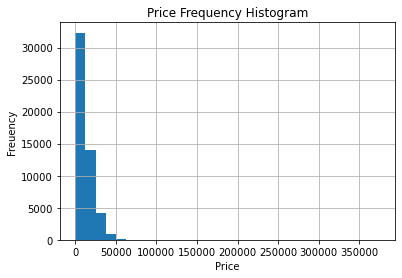

In [69]:
plt.hist(data['price'],bins=30)
plt.gca().set(ylabel='Freuency',xlabel='Price', title='Price Frequency Histogram')
plt.grid()

**We can notice that most of the histogram (values over 60K) are not even has a bar, probably cause by an outlier value**

**Study vehicle's age**

In [70]:
data.age.describe()

count    51525.000000
mean         9.513906
std          6.112976
min          1.000000
25%          5.000000
50%          9.000000
75%         13.000000
max        111.000000
Name: age, dtype: float64

In [71]:
age_up_limit = np.percentile(data['age'],99)
age_up_limit

28.0

In [72]:
age_low_limit = np.percentile(data['age'],1)
age_low_limit

1.0

In [73]:
# Check if the zeros in age column related to 'new' (5) in condition
zero_age = len(data['age']==0)
new = len((data['age']==0)&(data['condition']==5))
print('{:.0%}'.format(new / zero_age))

100%


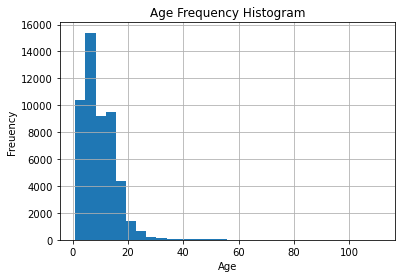

In [74]:
plt.hist(data['age'],bins=30)
plt.gca().set(ylabel='Freuency',xlabel='Age', title='Age Frequency Histogram')
plt.grid()

**Most of the histogram (ages greater then 55~) are not even has a bar, probably cause by an outlier value**

**Study mileage**

In [75]:
data.odometer.describe()

count     51525.000000
mean     115198.042038
std       62083.739734
min           0.000000
25%       73500.000000
50%      114072.000000
75%      152862.000000
max      990000.000000
Name: odometer, dtype: float64

In [76]:
mileage_up_limit = np.percentile(data['odometer'],99)
mileage_up_limit

280000.0

In [77]:
mileage_low_limit = np.percentile(data['odometer'],1)
mileage_low_limit

137.0

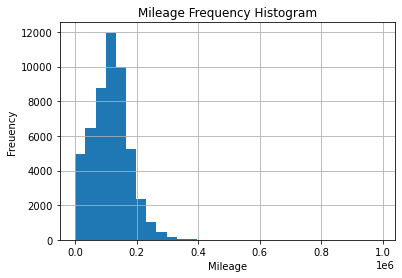

In [78]:
plt.hist(data['odometer'],bins=30)
plt.gca().set(ylabel='Freuency',xlabel='Mileage', title='Mileage Frequency Histogram')
plt.grid()

**Most of the histogram (mileage higher then 400000) are not even has a bar, probably cause by an outlier value**

**Study number of cylinders**

In [79]:
data.cylinders.describe()

count    51525.000000
mean         6.121067
std          1.657457
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64

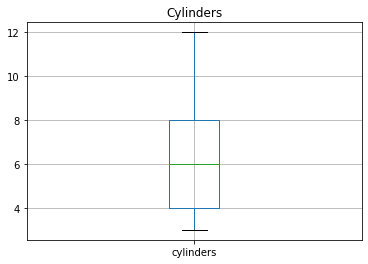

In [80]:
data.boxplot(column='cylinders')
plt.title('Cylinders')
plt.show()

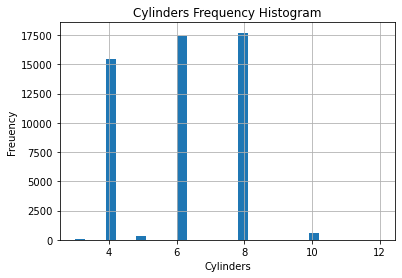

In [81]:
plt.hist(data['cylinders'],bins=30)
plt.gca().set(ylabel='Freuency',xlabel='Cylinders', title='Cylinders Frequency Histogram')
plt.grid()

**Study condition**

In [82]:
data.condition.describe()

count    51525.000000
mean         2.637535
std          0.712447
min          0.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: condition, dtype: float64

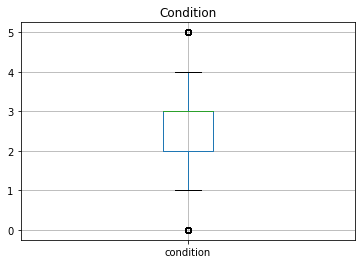

In [83]:
data.boxplot(column='condition')
plt.title('Condition')
plt.show()

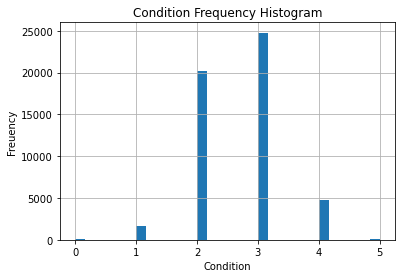

In [84]:
plt.hist(data['condition'],bins=30)
plt.gca().set(ylabel='Freuency',xlabel='Condition', title='Condition Frequency Histogram')
plt.grid()

**We may want to filter out '0' and '5'** 

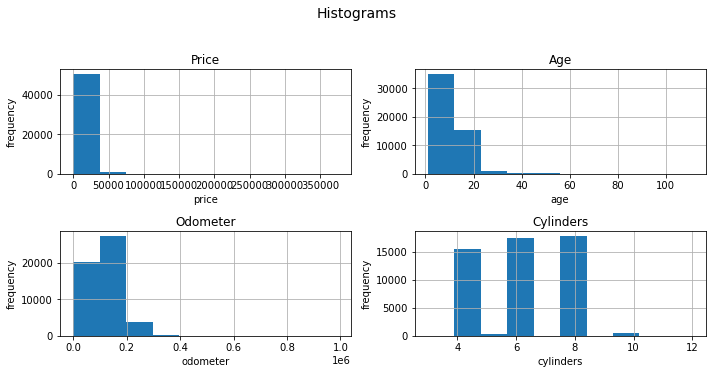

In [85]:
#Reviewer's code
WIDTH = 2 #3 graphs in rows
columns = ['price', 'age', 'odometer', 'cylinders', 'condition'] #what parameters you choose to plot
plot_amount = len(columns)#amount of plots
height = plot_amount//WIDTH #how many rows you need to plot your charts
fig, axs = plt.subplots(height, WIDTH, figsize=(10, 5)) #subplots help you to make several charts together, figsize - size of picture
fig.suptitle('Histograms',  y=1.03, size=14) #title of your charts

for item, ax in zip(columns, np.ravel(axs)): # writing `for` loop where you alternately сhoose columns from your dataset to plot
    data.hist(item, ax=ax) #plotting histograms
    ax.set_title(item.capitalize().replace('_', ' '), size=12) #Setting chart names: capitalize().replace('_', ' ') - remove _ and make space between words 
    ax.set_xlabel(item) #x-axes name
    ax.set_ylabel('frequency') #y-axes name

plt.tight_layout()#this module makes the graphs not stick together
plt.show()

## Study and treat outliers


In [86]:
#filter outliers prices
filtered_data = \
data.query('price > @price_low_limit and price < @price_up_limit')

In [87]:
filtered_data = filtered_data.query('age > @age_low_limit and age < @age_up_limit')

In [88]:
filtered_data = filtered_data.query('odometer > @mileage_low_limit and odometer < @mileage_up_limit')

In [89]:
filtered_data.describe()

,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,year,month,weekday,age,mile_mean
count,46458.000000,46458.000000,46458.000000,46458.000000,46458.000000,46458.000000,46458.000000,46458.000000,46458.000000,46458.000000,46458.000000,46458.000000
mean,11694.438870,2009.790133,2.628374,6.083021,118825.462504,0.491024,39.601360,2018.312088,6.599918,2.996900,9.521955,14324.194866
std,8210.586353,4.968259,0.687385,1.635532,53395.780927,0.499925,28.244936,0.463351,3.482108,1.994026,4.974577,7046.320876
min,1005.000000,1992.000000,0.000000,3.000000,138.000000,0.000000,0.000000,2018.000000,1.000000,0.000000,2.000000,6.666667
25%,5450.000000,2007.000000,2.000000,4.000000,81500.000000,0.000000,19.000000,2018.000000,3.000000,1.000000,6.000000,10000.000000
50%,9000.000000,2011.000000,3.000000,6.000000,119230.500000,0.000000,33.000000,2018.000000,7.000000,3.000000,9.000000,13256.802005
75%,15995.000000,2014.000000,3.000000,8.000000,153108.000000,1.000000,53.000000,2019.000000,10.000000,5.000000,13.000000,17276.303571
max,43990.000000,2018.000000,5.000000,12.000000,279937.000000,1.000000,271.000000,2019.000000,12.000000,6.000000,27.000000,82204.500000


## Study core parameters without outliers

[Use the filtered data to make new plots. Compare with the earlier ones (that included outliers). Draw conclusions for each.]

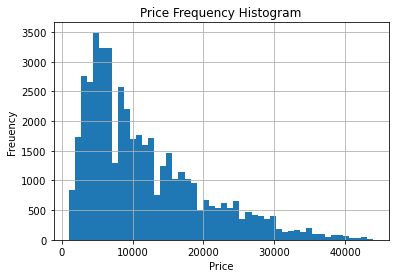

In [90]:
plt.hist(filtered_data['price'],bins=50)
plt.gca().set(ylabel='Freuency',xlabel='Price', title='Price Frequency Histogram')
plt.grid()

**Our new histogrm is now much more informative after we drop the outliers**

* We can see that the bars in our histogram are getting lower when the price move up.

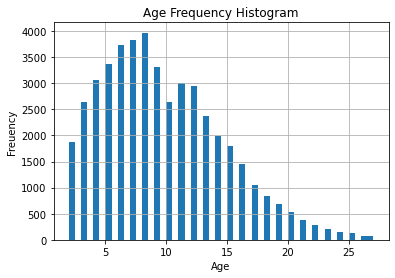

In [91]:
plt.hist(filtered_data['age'],bins=50)
plt.gca().set(ylabel='Freuency',xlabel='Age', title='Age Frequency Histogram')
plt.grid()

**The most common age for car listed are 7-8 years of age**


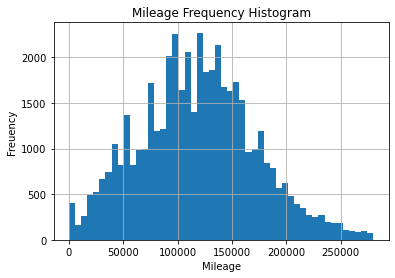

In [92]:
plt.hist(filtered_data['odometer'],bins=50)
plt.gca().set(ylabel='Freuency',xlabel='Mileage', title='Mileage Frequency Histogram')
plt.grid()

## Ads lifetime


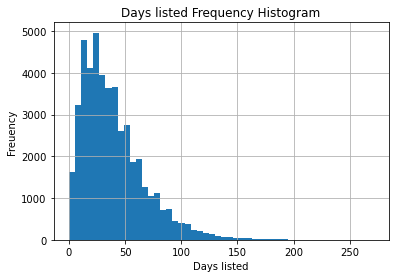

In [93]:
plt.hist(filtered_data['days_listed'],bins=50)
plt.gca().set(ylabel='Freuency',xlabel='Days listed', title='Days listed Frequency Histogram')
plt.grid()

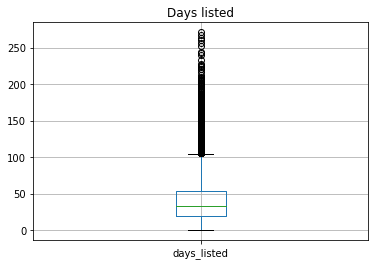

In [94]:
filtered_data.boxplot(column='days_listed')
plt.title('Days listed')
plt.show()

In [95]:
print('The median amount of days listed for ad is: {:.0f}'\
      .format(filtered_data.days_listed.median()))
print('The average amount of days listed for ad is: {:.0f}'\
      .format(filtered_data.days_listed.mean()))

The median amount of days listed for ad is: 33
The average amount of days listed for ad is: 40


In [96]:
print('Ads listed less then {:.0f} days are consider as removed quickly'\
     .format(np.percentile(filtered_data['days_listed'],1))
     )
print('Ads listed more then {:.0f} days are consider as abnormally long time listed'\
     .format(np.percentile(filtered_data['days_listed'],98)))

Ads listed less then 3 days are consider as removed quickly
Ads listed more then 115 days are consider as abnormally long time listed


## Average price per each type of vehicle

[Analyze the number of ads and the average price for each type of vehicle. Plot a graph showing the dependence of the number of ads on the vehicle type. Select the two types with the greatest number of ads.]

In [97]:
types = filtered_data.pivot_table(index='type', values=['price'], aggfunc=['count','mean']).reset_index()
types.columns = ['type','count','mean']
types = types.sort_values('count', ascending=False)
types

,type,count,mean
9,suv,11389,10828.966722
8,sedan,11146,6984.236497
10,truck,11021,16057.404954
7,pickup,6178,15273.804306
2,coupe,1889,13968.098994
12,wagon,1445,9218.505882
4,mini-van,1095,7834.674886
3,hatchback,944,6872.944915
11,van,572,10692.912587
1,convertible,349,12884.140401


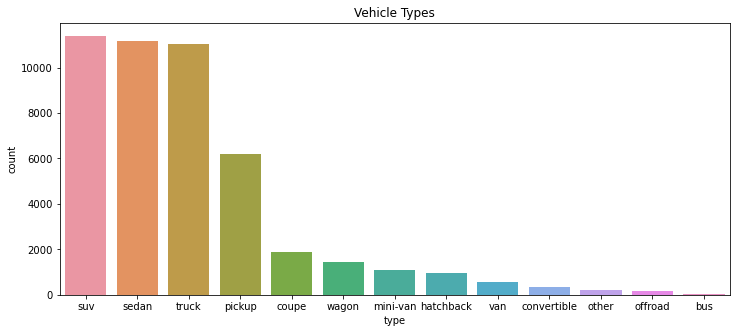

In [98]:
plt.figure(figsize=(12,5))
sns.barplot(data=types,x='type',y='count')
plt.title('Vehicle Types')
plt.show()

In [99]:
top_2 = list(types.head(2)['type'])
top_2

['suv', 'sedan']

## Price factors

**Checking dependencies for numerical values**

In [100]:
suv = filtered_data[filtered_data['type']=='suv']
suv.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year,month,weekday,age,mile_mean
0,9400,2011,bmw x5,2,6,gas,145000,automatic,suv,n/a,1,2018-06-23,19,2018,6,5,8,18125.000000
7,15990,2013,honda pilot,3,6,gas,109473,automatic,suv,black,1,2019-01-07,68,2019,1,0,7,15639.000000
8,11500,2012,kia sorento,3,4,gas,104174,automatic,suv,n/a,1,2018-07-16,19,2018,7,0,7,14882.000000
9,9200,2008,honda pilot,3,6,gas,147191,automatic,suv,blue,1,2019-02-15,17,2019,2,4,12,12265.916667
14,12990,2009,gmc yukon,3,8,gas,132285,automatic,suv,black,1,2019-01-31,24,2019,1,3,11,12025.909091


In [101]:
suv_scatter = suv[['price','age','odometer']]
suv_scatter.head()

,price,age,odometer
0,9400,8,145000
7,15990,7,109473
8,11500,7,104174
9,9200,12,147191
14,12990,11,132285


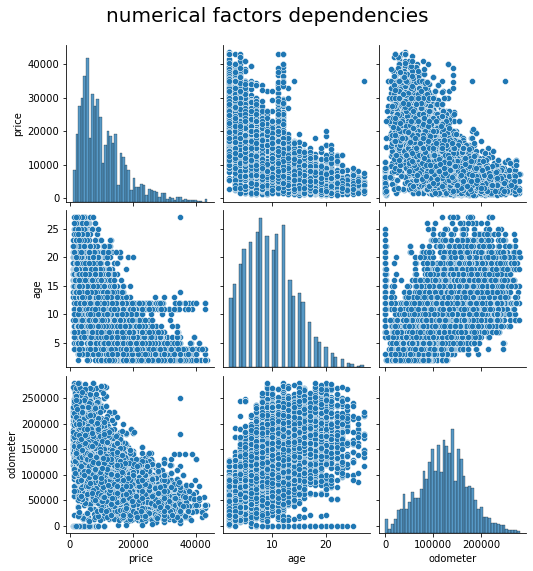

In [102]:
g = sns.pairplot(suv_scatter)

g.fig.suptitle("numerical factors dependencies", y=1.05, size=20)

plt.show()

In [103]:
suv_scatter.corr()

,price,age,odometer
price,1.000000,-0.619561,-0.605617
age,-0.619561,1.000000,0.610607
odometer,-0.605617,0.610607,1.000000


**There is now specific parameter that as a strong correlation (over 0.7) with the price.**

In [104]:
sedan = filtered_data[filtered_data['type']=='sedan']
sedan.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year,month,weekday,age,mile_mean
2,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,2019,2,3,7,15714.285714
4,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,2019,4,1,3,26967.666667
5,14990,2014,chrysler 300,3,6,gas,57954,automatic,sedan,black,1,2018-06-20,15,2018,6,2,5,11590.800000
6,12990,2015,toyota camry,3,4,gas,79212,automatic,sedan,white,0,2018-12-27,73,2018,12,3,4,19803.000000
11,8990,2012,honda accord,3,4,gas,111142,automatic,sedan,grey,0,2019-03-28,29,2019,3,3,8,13892.750000


In [105]:
sedan_scatter = sedan[['price','age','odometer']]
sedan_scatter.head()

,price,age,odometer
2,5500,7,110000
4,14900,3,80903
5,14990,5,57954
6,12990,4,79212
11,8990,8,111142


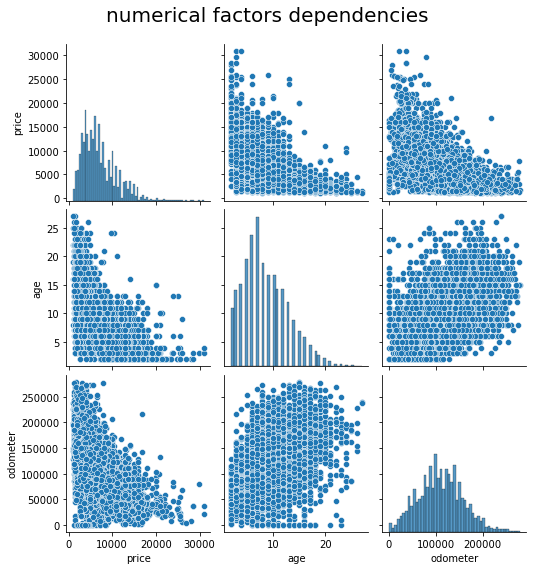

In [106]:
g = sns.pairplot(sedan_scatter)

g.fig.suptitle("numerical factors dependencies", y=1.05, size=20)

plt.show()

In [107]:
sedan_scatter.corr()

,price,age,odometer
price,1.000000,-0.665916,-0.629733
age,-0.665916,1.000000,0.595552
odometer,-0.629733,0.595552,1.000000


**There is now specific parameter that as a strong correlation (over 0.7) with the price.**

**Checking dependencies for categorical values**

In [108]:
suv_categorical = suv[['price','transmission','paint_color','condition']]
suv_categorical.head()

,price,transmission,paint_color,condition
0,9400,automatic,n/a,2
7,15990,automatic,black,3
8,11500,automatic,n/a,3
9,9200,automatic,blue,3
14,12990,automatic,black,3


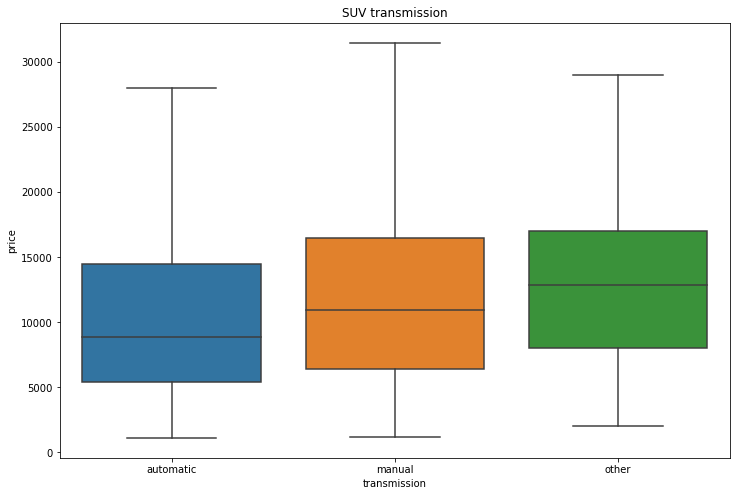

In [109]:
plt.figure(figsize=(12,8))
sns.boxplot(data=suv_categorical,x='transmission', y='price',showfliers=False)
plt.title('SUV transmission')
plt.show()

**We cannot claim that the transmission type is an obvious factor for the price, but In general, cars with automatic transmission tend to be cheaper then the others**

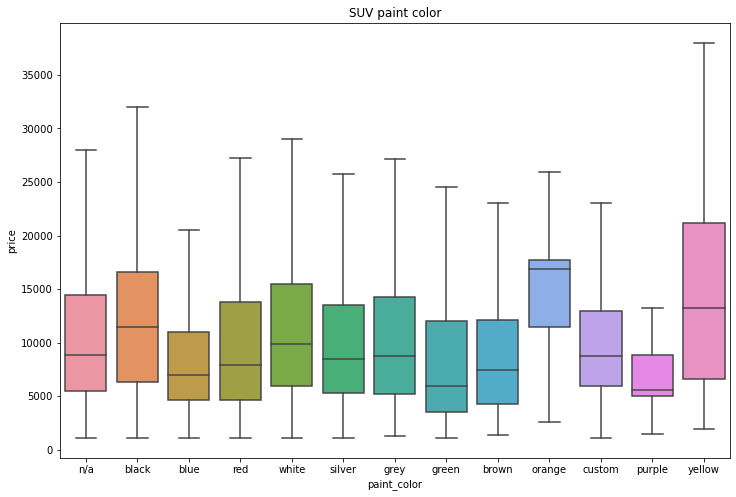

In [110]:
plt.figure(figsize=(12,8))
sns.boxplot(data=suv_categorical,x='paint_color', y='price',showfliers=False)
plt.title('SUV paint color')
plt.show()

* Orange cars tend to e a little more expensive then other cars
* Yellow cars seem to have bigger distribution comparing to other cars.

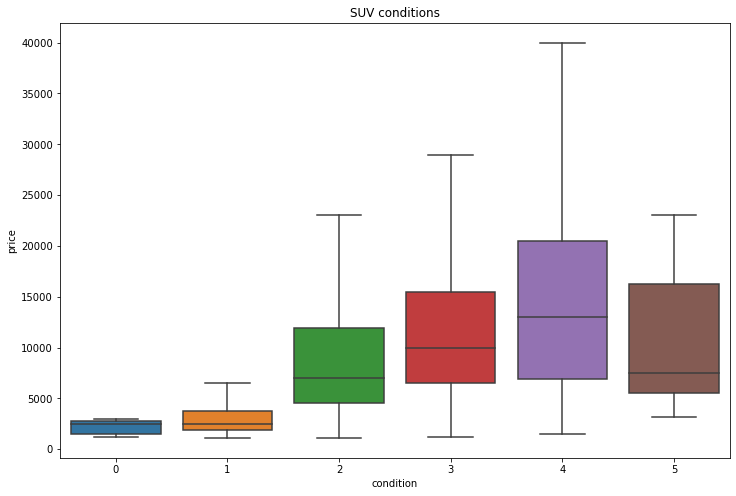

In [111]:
plt.figure(figsize=(12,8))
sns.boxplot(data=suv_categorical,x='condition', y='price',showfliers=False)
plt.title('SUV conditions')
plt.show()

**In general and as expected: Older cars are cheaper then new ones**

In [112]:
sedan_categorical = sedan[['price','transmission','paint_color','condition']]
sedan_categorical.head()

,price,transmission,paint_color,condition
2,5500,automatic,red,4
4,14900,automatic,black,3
5,14990,automatic,black,3
6,12990,automatic,white,3
11,8990,automatic,grey,3


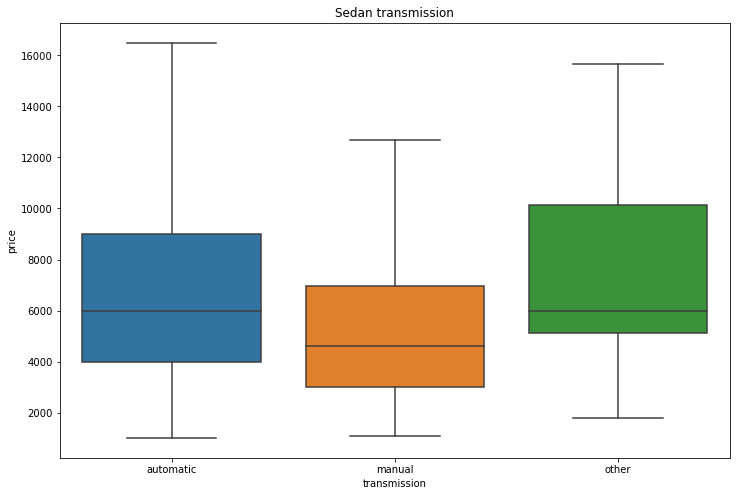

In [113]:
plt.figure(figsize=(12,8))
sns.boxplot(data=sedan_categorical,x='transmission', y='price',showfliers=False)
plt.title('Sedan transmission')
plt.show()

**There is no pattern suggest that transmission type have an affect on sedan prices**

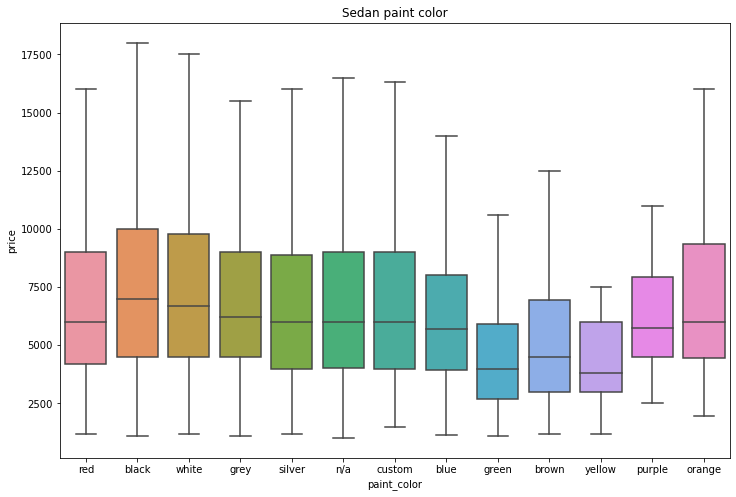

In [114]:
plt.figure(figsize=(12,8))
sns.boxplot(data=sedan_categorical,x='paint_color', y='price',showfliers=False)
plt.title('Sedan paint color')
plt.show()

**There is no pattern suggest that paint color have an affect on sedan prices**

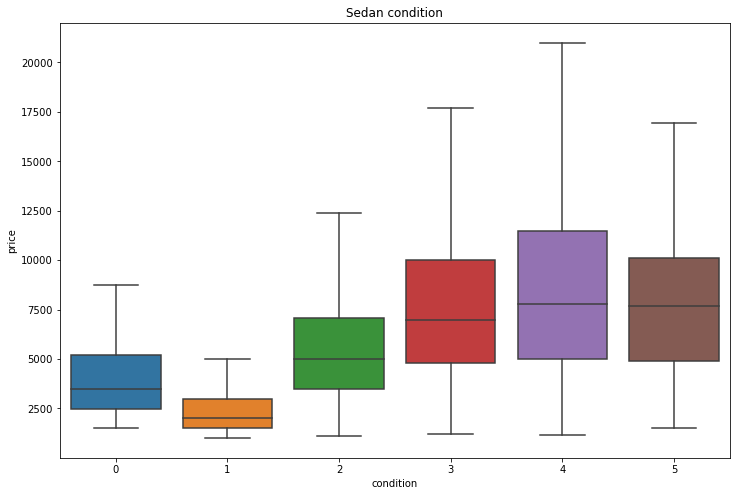

In [115]:
plt.figure(figsize=(12,8))
sns.boxplot(data=sedan_categorical,x='condition', y='price',showfliers=False)
plt.title('Sedan condition')
plt.show()

**looks similar to the boxplots for the SUV condition, older cars tend to be cheaper then new ones**

## General conclusion


**Conclusion**

* We started with the missing values and filled them with median after grouping model/year_model.

* We made further invesigate for each column in order to convert problematic data type.

* We added few more columns (year/month/weekday for the ad posted date, Average miles per year, vehicle age).

* We change the condition column to numerical values.


**main conclusion**

* There is now specific parameter that as a strong correlation (over 0.7) with the price.

* The parameter which have the most effect on the price is mileage with a correlation score of around 0.6.

* In general we can see that older cars are cheaper.
